In [61]:
import os
import zipfile
import time
import numpy as np
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

local_zip = 'tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/')
zip_ref.close()

local_zip = 'tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/')
zip_ref.close()

In [62]:
from tensorflow import keras
TRAINING_DIR ='tmp/rps/'
training_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_generator = training_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150, 150),
        class_mode='categorical'
)

TESTING_DIR = '/tmp/rps-test-set/'
testing_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

testing_generator = testing_datagen.flow_from_directory(
        TESTING_DIR,
        target_size=(150, 150),
        class_mode='categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [49]:
model = keras.Sequential([
                        keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
                        keras.layers.MaxPooling2D(2,2),
                        keras.layers.Conv2D(64, (3,3), activation='relu'),
                        keras.layers.MaxPooling2D(2,2),
                        keras.layers.Conv2D(128, (3,3), activation='relu'),
                        keras.layers.MaxPooling2D(2,2),
                        keras.layers.Conv2D(128, (3,3), activation='relu'),
                        keras.layers.MaxPooling2D(2,2),
                        keras.layers.Flatten(),
                        keras.layers.Dropout(rate = 0.5),
                        keras.layers.Dense(512, activation='relu'),
                        keras.layers.Dense(3, activation='softmax')
                    ])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [80]:
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
t1 = time.time()
history = model.fit_generator(train_generator, epochs = 25, validation_data = testing_generator, verbose = 1)
print(time.time() - t1)
model.save("rps.h5")

Epoch 1/25
79/79 [==============================] - 17s 210ms/step - loss: 0.0704 - acc: 0.9857 - val_loss: 0.4078 - val_acc: 0.9059
Epoch 2/25
79/79 [==============================] - 15s 189ms/step - loss: 0.0519 - acc: 0.9881 - val_loss: 0.6801 - val_acc: 0.8952
Epoch 3/25
79/79 [==============================] - 16s 204ms/step - loss: 0.0486 - acc: 0.9877 - val_loss: 0.6805 - val_acc: 0.8710
Epoch 4/25
79/79 [==============================] - 18s 228ms/step - loss: 0.0371 - acc: 0.9905 - val_loss: 0.1744 - val_acc: 0.9247
Epoch 5/25
79/79 [==============================] - 17s 211ms/step - loss: 0.0615 - acc: 0.9893 - val_loss: 0.7200 - val_acc: 0.9167
Epoch 6/25
79/79 [==============================] - 16s 202ms/step - loss: 0.0428 - acc: 0.9901 - val_loss: 1.4014 - val_acc: 0.8952
Epoch 7/25
79/79 [==============================] - 16s 198ms/step - loss: 0.0692 - acc: 0.9869 - val_loss: 0.7407 - val_acc: 0.9167
Epoch 8/25
79/79 [==============================] - 16s 205ms/step - 

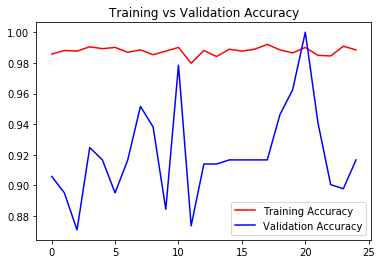

<Figure size 432x288 with 0 Axes>

In [81]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')

plt.title('Training vs Validation Accuracy')
plt.legend(loc = 0)
plt.figure()

plt.show()

In [83]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

(wx, wy, length) = (370, 120, 250)
(user_points, auto_points) = (0, 0)
(previous_prediction, prediction) = ("!", "@")
(predict, restart, auto) = ("", False, "")
classes = ["Paper", "Rock", "Scissor"]

video = cv2.VideoCapture(0)

while(True):
    check, frame = video.read()

#frame = np.reshape(frame, (1, 150, 150, -1))
#gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#cv2.imshow('frame', gray)

    if restart:
        (user_points, auto_points) = (0, 0)
        restart = False
        
    if check:
        cv2.rectangle(frame, (wx, wy), (wx + length - 1, wy + length - 1), (255, 0, 0), 1)
        cv2.putText(frame, "Your Points : %d, Computer Points : %d"%(user_points, auto_points), (50, 70), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 1)
        cv2.putText(frame, "You : %s, Computer : %s"%(predict, auto), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 1)
        cv2.imshow("Rock Paper Scissor", frame)
        frame = frame[wy : wy + length, wx : wx + length]
        frame = cv2.resize(frame, (150, 150))
        frame = np.expand_dims(frame, axis=0)
        prediction = model.predict(frame)[0]
        predict = classes[np.argmax(prediction)]
        #print(prediction)
        if predict != previous_prediction:
            auto = random.choice(classes)
            if predict == "Paper" and auto == "Rock":
                user_points += 1
            if predict == "Paper" and auto == "Scissor":
                auto_points += 1
            if predict == "Rock" and auto == "Paper":
                auto_points += 1
            if predict == "Rock" and auto == "Scissor":
                user_points += 1
            if predict == "Scissor" and auto == "Paper":
                user_points += 1
            if predict == "Scissor" and auto == "Rock":
                auto_points += 1
            previous_prediction = predict
        
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    if key == ord('r'):
        restart = True
        
video.release()
cv2.destroyAllWindows()